In [2]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


# Se levanta el set de train generado

In [3]:
data_set = pd.read_csv("train_set_xgb.csv")
#X = data_set.loc[:, (data_set.columns != 'precio') & (data_set.columns != 'factor_pm')]
X = data_set.loc[:, (data_set.columns != 'precio')]
y = data_set.loc[:, ['precio']]

In [4]:
data_set.columns

Index(['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos',
       'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio', 'usosmultiples',
       'piscina', 'escuelascercanas', 'centroscomercialescercanos', 'precio',
       'anio_publ'],
      dtype='object')

In [5]:
X.columns

Index(['antiguedad', 'habitaciones', 'garages', 'banos', 'metroscubiertos',
       'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio', 'usosmultiples',
       'piscina', 'escuelascercanas', 'centroscomercialescercanos',
       'anio_publ'],
      dtype='object')

In [6]:
y.columns

Index(['precio'], dtype='object')

# Se convierten los datos a DMatrix 

In [7]:
data_DMatrix = xgb.DMatrix(data = X, label = y)

# Se separa en train y en test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=1)

In [9]:
len(X_train)

144000

In [10]:
len(X_test)

96000

# Se define el modelo

In [11]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                colsample_bytree = 0.3, learning_rate = 1,
                max_depth = 5, alpha = 10, n_estimators = 200)

# grid_searchCV. Para busqueda de hiperparametros (tarda MUCHO)

Por ahora esta todo comentado para no usarse cada vez que se corre

In [12]:
# A parameter grid for XGBoost
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xg_reg, param_distributions=params, random_state=1001 )
# 
# random_search.fit(X_train, y_train)

/home/manu/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBRegressor(alpha=10, base_score=0.5,
                                          booster='gbtree', colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.3, gamma=0,
                                          importance_type='gain',
                                          learning_rate=1, max_delta_step=0,
                                          max_depth=5, min_child_weight=1,
                                          missing=None, n_estimators=200,
                                          n_jobs=1, nthread=None,
                                          objective='reg:squ...
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   i

In [14]:
# random_search.best_estimator_.

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=5,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=3, min_child_weight=5, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1.0, verbosity=1)

In [15]:
# pred_train = random_search.best_estimator_.predict(X_train)

In [16]:
# pred_test = random_search.best_estimator_.predict(X_test)

In [17]:
# mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
# mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
# print("MAE train: "+str(mae_train))
# print("MAE test: "+str(mae_test))

MAE train: 813.3363404352157
MAE test: 829.6381816465472


In [19]:
# test_set = pd.read_csv("test_set_xgb.csv")

In [20]:
# pred_a_kaggle = random_search.best_estimator_.predict(test_set.loc[:, test_set.columns != 'id'])

# Se entrena el modelo con el set de train

In [59]:
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

# Se calcula la prediccion del set de test y del set de entrenamiento tambien

In [60]:
pred_train = xg_reg.predict(X_train)

In [61]:
pred_test = xg_reg.predict(X_test)

# Se evaluan ambas predicciones

## Como metrica se utiliza RMSLE (cuanto mas cercano a 0, mejor)

In [62]:
# rmsle_train = np.sqrt(sklearn.metrics.mean_squared_log_error(y_train, pred_train))
# rmsle_test = np.sqrt(sklearn.metrics.mean_squared_log_error(y_test, pred_test))
# print("RMSLE train: "+str(rmsle_train))
# print("RMSLE test: "+str(rmsle_train))


Esta comentado porque se ve que hay algun numero negativo. Entonces no se puede calcular el logaritmo

## Metrica de Mean Absolute Error (La de Kaggle) ?? (Hay que preguntar)

In [63]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 799.0965314026138
MAE test: 852.2368163857099


# Importancia de Features

<Figure size 3600x3600 with 0 Axes>

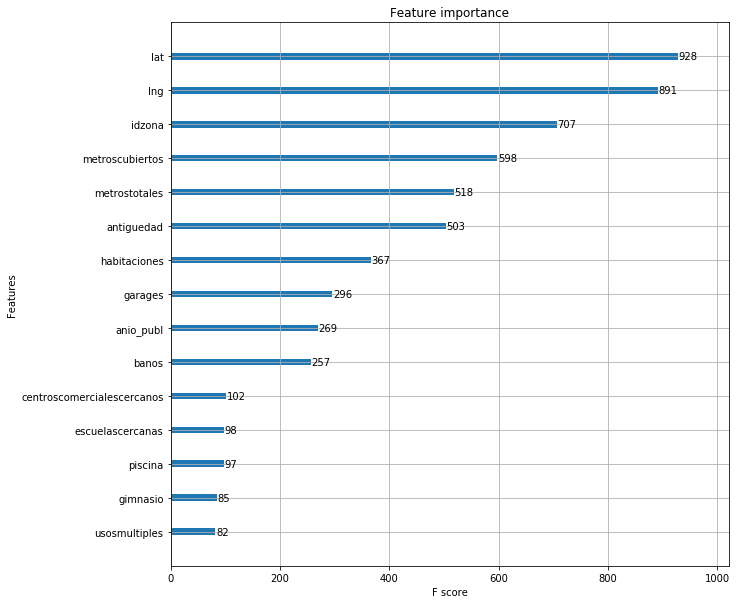

In [64]:
plt.figure(figsize = (50,50))
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# Se genera el archivo con las predicciones a subir a Kaggle

In [65]:
test_set = pd.read_csv("test_set_xgb.csv")

In [66]:
test_set.columns

Index(['id', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'gimnasio',
       'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'anio_publ'],
      dtype='object')

Predigo sin el 'id' porque no es parte de los features

In [67]:
pred_a_kaggle = xg_reg.predict(test_set.loc[:, test_set.columns != 'id'])

In [68]:
pred_a_kaggle

array([6178897.5, 1620501.5, 2285524.5, ...,  866092.4, 1533386.8,
       2592262. ], dtype=float32)

In [21]:
df_a_kaggle = pd.DataFrame()
df_a_kaggle['id'] = test_set['id']
df_a_kaggle['target'] = pred_a_kaggle
df_a_kaggle.head()

,id,target
0,4941,6.425772e+06
1,51775,9.466057e+05
2,115253,2.111639e+06
3,299321,1.179665e+06
4,173570,8.014927e+05


In [22]:
len(df_a_kaggle)

60000

In [23]:
df_a_kaggle.to_csv("subir_a_kaggle_xgb_individual", header = True, index = False)